# Support Vector Regression

## Importing the libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [41]:
dataset = pd.read_csv("../datasets/Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [42]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [43]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [44]:
print(y)


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [45]:
y = y.reshape(len(y),1) # standardscaler aspects y to be 2D array so,we convert it.

In [46]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc_x = StandardScaler() # taking different scaler because after fit transform of y the stats of x is not stored and also it cannot be retrieved when needed
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)


In [48]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [49]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [50]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Prediciting a new result

In [51]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1)) # inverse transform expect to be 2D array

array([[170370.0204065]])

## Visualizing the SVR results

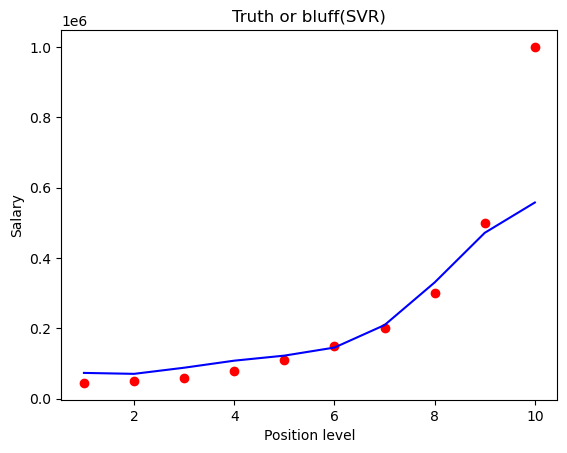

In [53]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue')
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.title("Truth or bluff(SVR)")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

C:\Users\Dell\AppData\Local\Temp\ipykernel_18100\3414753296.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid=np.arange(min(sc_x.inverse_transform(X)),max(sc_x.inverse_transform(X)),0.1)


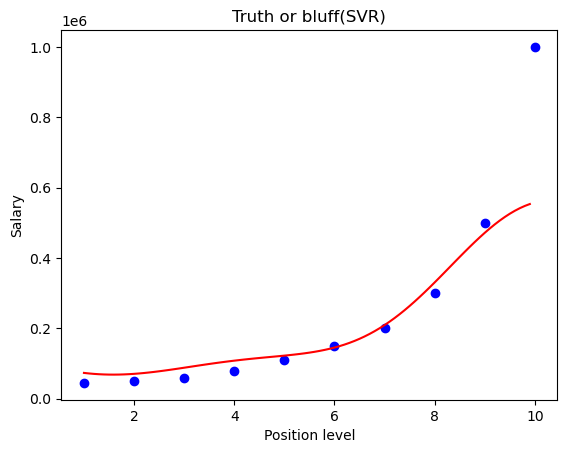

In [64]:
X_grid=np.arange(min(sc_x.inverse_transform(X)),max(sc_x.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(-1,1)
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid)).reshape(-1,1)),color='red')
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y), color = 'blue')
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.title("Truth or bluff(SVR)")
plt.show()